In [1]:
import matplotlib.pyplot as plt
import anndata as ad
import numpy as np
import pandas as pd
import scanpy as sc
import scipy as sp
import seaborn as sb
from moscot.problems.time import TemporalProblem

/home/icb/luca.eyring/miniconda3/envs/neural-ot/lib/python3.9/site-packages/docrep/decorators.py:43: SyntaxWarning: 'dataset.parameters' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [45]:
new_adata = sc.read("/lustre/groups/ml01/projects/2022_neural_ot/adata_pancreas_2019.h5ad")

In [18]:
print(adata)

AnnData object with n_obs × n_vars = 20519 × 16206
    obs: 'day', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'proliferation', 'G2M_score', 'S_score', 'clusters_fig3_final', 'clusters_fig3_final_noep', 'clusters_fig4_final', 'clusters_fig2_final', 'clusters_fig6_broad_final', 'clusters_fig6_fine_final', 'clusters_fig6_alpha_final', 'celltype'
    var: 'n_cells', 'highly_variable_genes', 'expression_mean', 'dispersion'
    uns: 'clusters_fig6_fine_final_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'


In [19]:
map_dict = {"12.5": 12.5, "13.5": 13.5, "14.5": 14.5, "15.5": 15.5}
adata.obs["day"] = adata.obs["day"].copy().map(map_dict)

In [20]:
leave_out = [12.5, 13.5]
new_adata = adata[~adata.obs['day'].isin(leave_out)].copy()

In [21]:
tp = TemporalProblem(new_adata)
tp = tp.prepare("day")
tp = tp.score_genes_for_marginals(gene_set_proliferation="mouse", gene_set_apoptosis="mouse", proliferation_key="prolif")

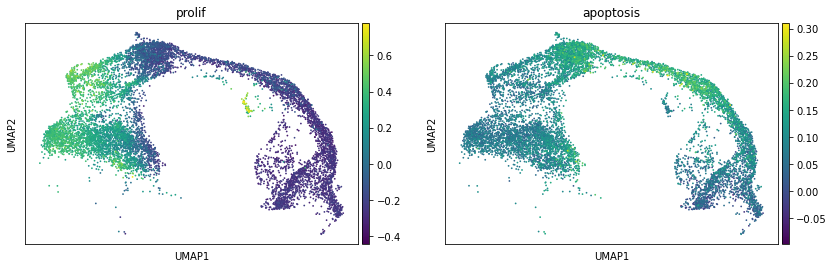

In [22]:
sc.pl.umap(new_adata[new_adata.obs["day"] == 14.5], color=['prolif', "apoptosis"])

In [23]:
new_adata.obs["growth_rate"] = np.exp(new_adata.obs["prolif"] - new_adata.obs["apoptosis"])
new_adata.obs["scaled_growth_rate"] = np.exp(2 * (new_adata.obs["prolif"] - new_adata.obs["apoptosis"]))
new_adata.obs["scaled3_growth_rate"] = np.exp(3 * (new_adata.obs["prolif"] - new_adata.obs["apoptosis"]))
new_adata.obs["scaled4_growth_rate"] = np.exp(4 * (new_adata.obs["prolif"] - new_adata.obs["apoptosis"]))

In [11]:
print(new_adata)

AnnData object with n_obs × n_vars = 20519 × 16206
    obs: 'day', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'proliferation', 'G2M_score', 'S_score', 'clusters_fig3_final', 'clusters_fig3_final_noep', 'clusters_fig4_final', 'clusters_fig2_final', 'clusters_fig6_broad_final', 'clusters_fig6_fine_final', 'clusters_fig6_alpha_final', 'celltype', 'prolif', 'apoptosis', 'growth_rate', 'scaled_growth_rate', 'scaled3_growth_rate', 'scaled4_growth_rate'
    var: 'n_cells', 'highly_variable_genes', 'expression_mean', 'dispersion'
    uns: 'clusters_fig6_fine_final_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'


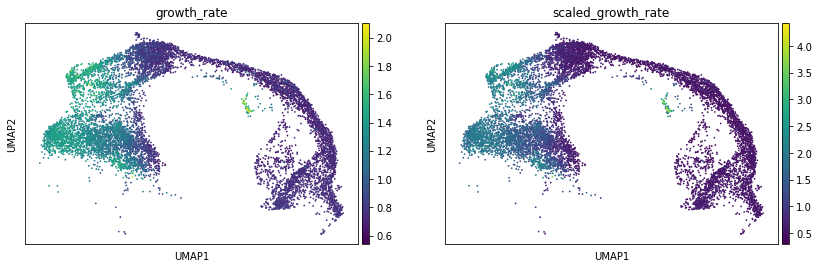

In [9]:
sc.pl.umap(new_adata[new_adata.obs["day"] == 14.5], color=["growth_rate", "scaled_growth_rate"])

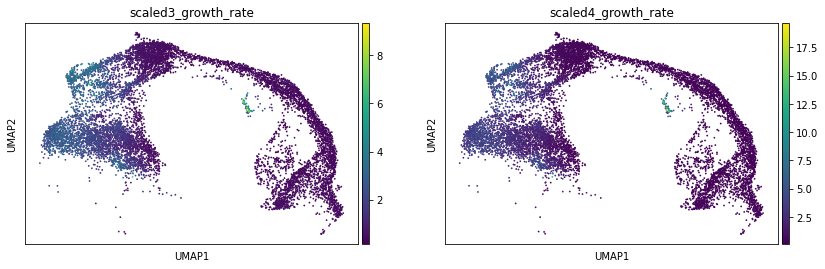

In [10]:
sc.pl.umap(new_adata[new_adata.obs["day"] == 14.5], color=["scaled3_growth_rate", "scaled4_growth_rate"])

In [46]:
days = new_adata.obs["day"].unique()
print(days)
[new_adata[new_adata.obs["day"] == day].shape for day in days]

['14.5', '15.5']
Categories (2, object): ['14.5', '15.5']


[(9633, 16206), (10886, 16206)]

In [51]:
sc.pp.pca(new_adata)

In [52]:
print(new_adata)

AnnData object with n_obs × n_vars = 20519 × 16206
    obs: 'day', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'proliferation', 'G2M_score', 'S_score', 'clusters_fig3_final', 'clusters_fig3_final_noep', 'clusters_fig4_final', 'clusters_fig2_final', 'clusters_fig6_broad_final', 'clusters_fig6_fine_final', 'clusters_fig6_alpha_final', 'celltype'
    var: 'n_cells', 'highly_variable_genes', 'expression_mean', 'dispersion', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters_fig6_fine_final_colors', 'hvg', 'pca'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'


In [33]:
print(new_adata.obsm["X_pca"].shape)

(20519, 50)


In [13]:
new_adata.X = new_adata.X.copy().toarray()

In [14]:
print(new_adata.X.shape)
print(type(new_adata.X))
print(np.max(new_adata.X))
print(np.min(new_adata.X))
print(np.std(new_adata.X))
print(np.mean(new_adata.X))
print(np.median(new_adata.X))

(20519, 16206)
<class 'numpy.ndarray'>
24.46001
0.0
0.61493975
0.25333145
0.0


In [50]:
#Perform a clustering for scran normalization in clusters
sc.pp.highly_variable_genes(new_adata, flavor='cell_ranger', n_top_genes=2000,)
new_adata = new_adata[:,new_adata.var['highly_variable']].copy()
print(new_adata.shape)

(20519, 16206)


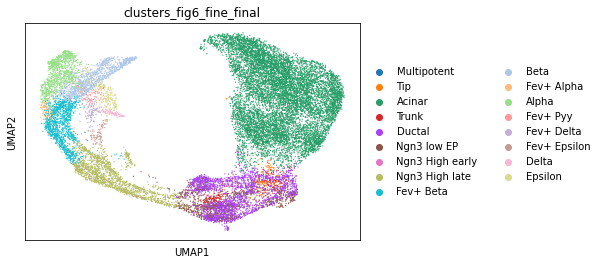

In [58]:
sc.pl.umap(new_adata, color=['clusters_fig6_fine_final'])

In [18]:
days = [14.5, 15.5]

In [34]:
for day in days:
    episode_adata = new_adata[new_adata.obs["day"] == day].copy()
    episode_adata.write(f"data/pancreas/day_{day}_growth_rate.h5ad")

In [12]:
for cell_type in new_adata.obs['clusters_fig6_fine_final'].unique():
    test_adata = new_adata[new_adata.obs['clusters_fig6_fine_final'] == cell_type].copy()
    print(cell_type, test_adata.shape)
    for day in days:
        print(test_adata[test_adata.obs["day"] == day].shape)

Beta (1177, 16206)
(586, 16206)
(591, 16206)
Acinar (10391, 16206)
(3261, 16206)
(7130, 16206)
Fev+ Beta (1338, 16206)
(881, 16206)
(457, 16206)
Trunk (322, 16206)
(269, 16206)
(53, 16206)
Ngn3 High late (1693, 16206)
(1051, 16206)
(642, 16206)
Ductal (2433, 16206)
(1517, 16206)
(916, 16206)
Tip (161, 16206)
(155, 16206)
(6, 16206)
Ngn3 low EP (1104, 16206)
(842, 16206)
(262, 16206)
Fev+ Alpha (109, 16206)
(103, 16206)
(6, 16206)
Epsilon (223, 16206)
(81, 16206)
(142, 16206)
Delta (102, 16206)
(32, 16206)
(70, 16206)
Alpha (1119, 16206)
(638, 16206)
(481, 16206)
Fev+ Delta (99, 16206)
(48, 16206)
(51, 16206)
Fev+ Epsilon (96, 16206)
(50, 16206)
(46, 16206)
Fev+ Pyy (116, 16206)
(84, 16206)
(32, 16206)
Ngn3 High early (21, 16206)
(21, 16206)
(0, 16206)
Multipotent (15, 16206)
(14, 16206)
(1, 16206)


In [59]:
print(new_adata)

AnnData object with n_obs × n_vars = 20519 × 16206
    obs: 'day', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'proliferation', 'G2M_score', 'S_score', 'clusters_fig3_final', 'clusters_fig3_final_noep', 'clusters_fig4_final', 'clusters_fig2_final', 'clusters_fig6_broad_final', 'clusters_fig6_fine_final', 'clusters_fig6_alpha_final', 'celltype'
    var: 'n_cells', 'highly_variable_genes', 'expression_mean', 'dispersion', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters_fig6_fine_final_colors', 'hvg', 'pca', 'day_colors', 'neighbors', 'umap'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'
